## Correlation Analysis
---

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import crowded.method as cr
import crowded.iterate as ci
%matplotlib inline

*The Analysis is based on the simulations file where it is been iterated all the interactions among the different variables*

---
#### Runing the generator

In [ ]:
!python ../generator.py

        tasks = [100]
        workers = [30, 40]
        prop = [0.5, 0.6]
        wpt = [3, 5, 7]
        answers_key = ["liver", "blood", "lung", "brain", "heart"]
        hard_t = [0.2]
        good_w = [0.9]

In [11]:
df_simulations = pd.read_csv('../data/df_simulations.csv')

In [12]:
df_simulations.columns = ['event','tasks','workers','training','workers_per_task',
                          'hard_tasks','good_workers','accuracy','proportion']

In [21]:
df_simulations.isnull().sum()

event                  0
tasks                  0
workers                0
training               0
workers_per_task       0
hard_tasks             0
good_workers           0
accuracy            9603
proportion          9602
dtype: int64

In [39]:
df_simulations

,tasks,workers,training,workers_per_task,hard_tasks,good_workers,accuracy,proportion,rel_work_task
0,60,20,0.2,3,0.1,0.1,NaN,NaN,0.333333
1,60,20,0.2,3,0.1,0.3,NaN,NaN,0.333333
2,60,20,0.2,3,0.1,0.5,NaN,NaN,0.333333
3,60,20,0.2,3,0.1,0.7,0.874167,0.22,0.333333
4,60,20,0.2,3,0.1,0.9,NaN,NaN,0.333333
5,60,20,0.2,3,0.3,0.1,NaN,NaN,0.333333
6,60,20,0.2,3,0.3,0.3,NaN,NaN,0.333333
7,60,20,0.2,3,0.3,0.5,NaN,NaN,0.333333
8,60,20,0.2,3,0.3,0.7,NaN,NaN,0.333333
9,60,20,0.2,3,0.3,0.9,NaN,NaN,0.333333


In [22]:
df_simulations.isnull().sum()[-1] / len(df_simulations)

0.73158095238095233

In [28]:
df_simulations['rel_work_task'] = df_simulations['workers']/df_simulations['tasks']

In [32]:
df_simulations = df_simulations.loc[:, df_simulations.columns != 'event']

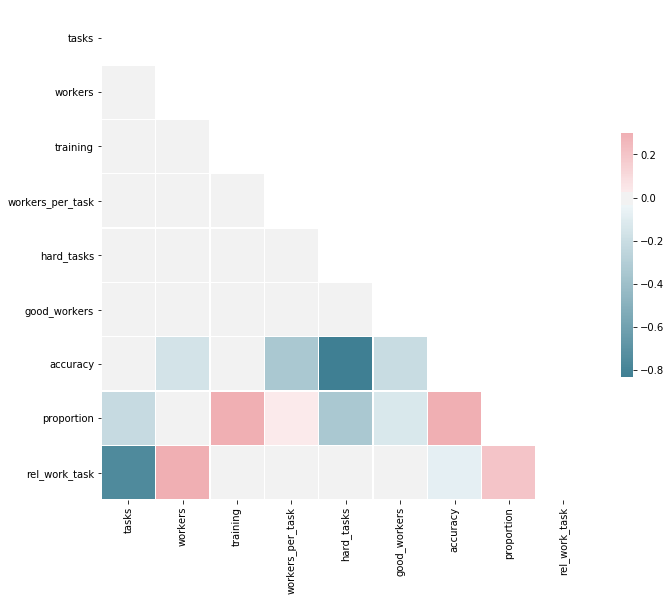

In [33]:
corr = df_simulations.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})